In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import airy

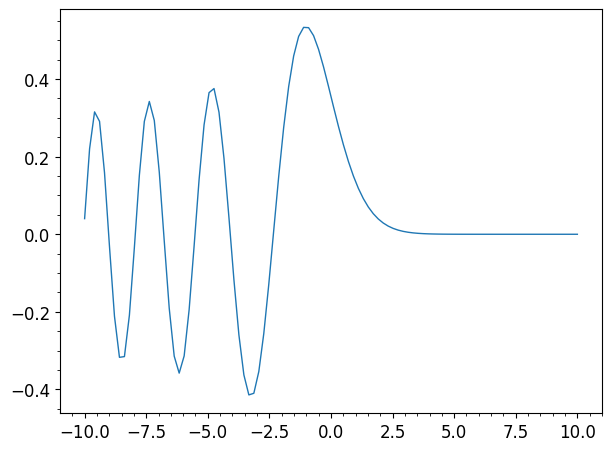

In [2]:
x = np.linspace(-10, 10, 100 )
A, _, B, _ = airy(x)
plt.plot(x, A)

In [3]:
L = 1.0

X_plus = lambda beta: beta + L/2
X_minus = lambda beta: beta - L/2


We must solve for 

$$A(X_{+}(\beta))B(X_{-}(\beta)) = A(X_{-}(\beta))B(X_{+}(\beta))$$

Finding the zeroes of

$$G(\beta) = A(X_{+}(\beta))B(X_{-}(\beta)) - A(X_{-}(\beta))B(X_{+}(\beta)) = 0$$


## Adimensional case

In [4]:
def G(beta):
    global L
    A_plus, _, B_plus, _ = airy(X_plus(beta))
    A_minus, _, B_minus, _ = airy(X_minus(beta))
    return A_plus*B_minus - A_minus*B_plus


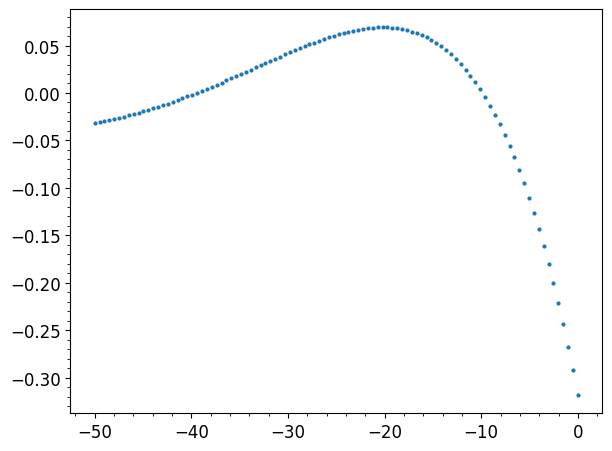

In [5]:
betas = np.linspace(-50, 0, 100)

plt.plot(betas, G(betas), ls="", marker=".")

In [6]:
from scipy.signal import argrelmin

guesses_indx = argrelmin(np.abs(G(betas)))
guesses = betas[guesses_indx[0]]
guesses

array([-39.39393939, -10.1010101 ])

In [7]:
from scipy.optimize import root

for guess in guesses:
    solution = root(G, guess).x[0]
    print(f"guess was {guess}")
    print(f"energy is {solution}")

guess was -39.39393939393939
energy is -39.47874478988236
guess was -10.101010101010097
energy is -9.868507161836225


## Back to the dimensionate case

In [8]:
q_e= 1.6*1e-19 #Coulomb
m = 9.1*1e-31 #kg
m_e=m*0.04 
m_h=m*0.836 
l=5*1e-9 #m lunghezza assiale del dot
h_bar = 1.05*1e-34 #J*Hz
h_bar_ev = 6.582*1e-16 #in eV*s
c_f = 1.60218*1e-19 #fattore di conversione da eV in Joule
E_e=90 #energia confinamento meV
l_eff=np.pi*h_bar/(np.sqrt(2*m_e*90*1e-3*c_f))

# Applied field
F = 1.4/590*1e9 #V/m

In reality this is

$$X_{\pm} = -\left(\frac{2 m_e}{(q \hbar F)^2}\right)^{\frac{1}{3}} (E_e \pm q F \frac{L}{2} )$$

Define:

$$E_0(F) = \left(\frac{2 m_e}{(q \hbar F)^2}\right)^{-\frac{1}{3}}$$

So we have

$$X_{\pm} = - \frac{(E_e \pm q F \frac{L}{2} )}{E_0(F)}$$


In [9]:
E_0= ((2*m_e)/(q_e*h_bar*F)**2)**(-1/3)
print("E0=", E_0)

def X_plus_dim(E_eV):
    global q_e, F, l_eff, c_f, E_0
    
    Ee_joule = E_eV*c_f
    return - (Ee_joule + q_e*F*l_eff/2)/E_0

def X_minus_dim(E_eV):
    global q_e, F, l_eff, c_f, E_0
    
    Ee_joule = E_eV*c_f
    return - (Ee_joule - q_e*F*l_eff/2)/E_0

E0= 2.7947721750486823e-21


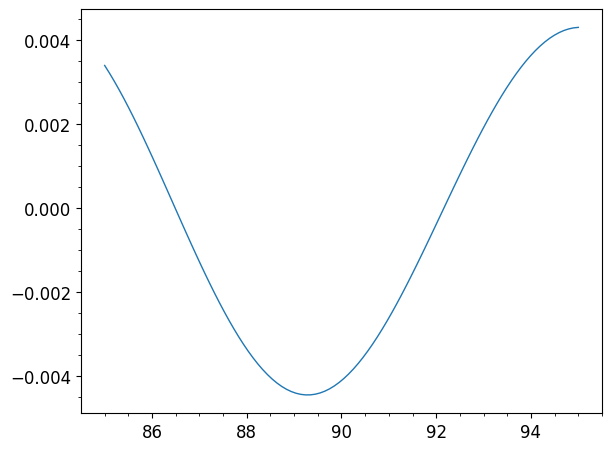

In [16]:
def G_dim(E_ev):
    
    A_plus, _, B_plus, _ = airy(X_plus_dim(E_ev))
    A_minus, _, B_minus, _ = airy(X_minus_dim(E_ev))
    return A_plus*B_minus - A_minus*B_plus

energies = np.linspace(85, 95, 100)
plt.plot(energies, G_dim(energies))

In [12]:
from scipy.signal import argrelmin

guesses_indx = argrelmin(np.abs(G_dim(energies)))
guesses = energies[guesses_indx[0]]
guesses

array([86.51515152, 92.17171717])

In [18]:
from scipy.optimize import root

for guess in guesses:
    solution = root(G_dim, guess).x[0]
    print(f"guess was {guess} eV")
    print(f"energy is {solution} eV")
    print()

guess was 86.51515151515152 eV
energy is 86.4900001399032 eV

guess was 92.17171717171718 eV
energy is 92.16000013129349 eV



## Now to the integral


Define

$$\xi^{e/h}(z) = A(X(z)^{e/h})- \frac{A(X_{-}^{e/h})}{A(X_{+}^{e/h})}B(X(z))$$

$$E_b \propto - \frac{4 q^2}{\epsilon R^2} \int_{-Le/2}^{Le/2} \int_{-Lh/2}^{Lh/2} d z_e d z_h (\xi^e(z_e))^2 (\xi^h(z_h))^2 |z_e - z_h| \cdot \frac{\pi}{2} \left( H_1(2 \frac{|z_e - z_h|}{R}) - N_1(2 \frac{|z_e - z_h|}{R}) - \frac{2}{\pi}\right)  $$


where $H_1$ is the Struve function of order 1 and $N_1$
 is the Neumann function of order 1.